# <center>Graphing Network Data with Pandas</center>

<center>Dr. W.J.B. Mattingly</center>

<center>Smithsonian Data Science Lab and United States Holocaust Memorial Museum</center>

<center>August 2021</center>

## Covered in this Chapter

1) How to Get Network Data from Pandas to NetworkX<br>
2) How to Graph the Data<br>
3) How to Customize the Graph<br>

## Getting the Data from Pandas to NetworkX

Pandas on its own cannot plot out network data. Instead, we must rely on two other libraries, NetworkX and Matplotlib. NetworkX is the standard Python library for working with networks. I have a forthcoming textbook, like this one, that walks users through NetworkX. Matplotlib is one of the standard plotting libraries. The purpose of this brief notebook, is to provide the code necessary for making Pandas work with NetworkX and Matplotlib to take networks stored in a Pandas DataFrame and transform the relationships into graphs.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Let's now load our data and see what it looks like.

In [2]:
df = pd.read_csv("data/network.csv")

In [3]:
df

,source,target
0,Tom,Rose
1,Rose,Rosita
2,Jerry,Jeff
3,Jeff,Larry
4,Carmen,Carmen
5,Rosita,Rosita
6,Larry,Carmen
7,Larry,Jerry


This is a pretty standard format for networks. We have two columns of data, a source, and a target. Imagine drawing a line to demonstrate networks, the source is where you start drawing the line and the target is where that line ends. This is known as force in network theory and is important for understanding the relationship between nodes, or individual points, in a network graph.

We can use NetworkX's built in function from_pandas_edgelist() and get that data straight into an edgelist.

In [4]:
G= nx.from_pandas_edgelist(df, "source", "target")

## Graphing the Data

And with just two more lines of code we can plot that data out.

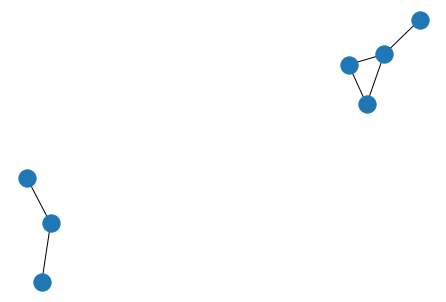

In [5]:
nx.draw(G)
plt.show()

## Customize the Graph

We have a problem with the image above, however, it is difficult to understand who the nodes represent. Let's give them some labels.

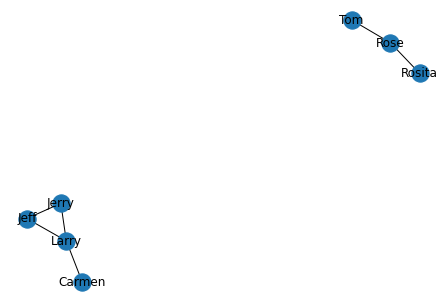

In [6]:
nx.draw(G, with_labels=True)
plt.show()

Now that we have labels, we need to make them a bit easier to read. We can do this by changing the font color to "whitesmoke" and setting the background to gray. To achieve this we first need to create a fig object to which we will append a few attributes. Next, we draw the network graph and give it a font_color of our desire. Finally, we set the facecolor to gray and plot it.

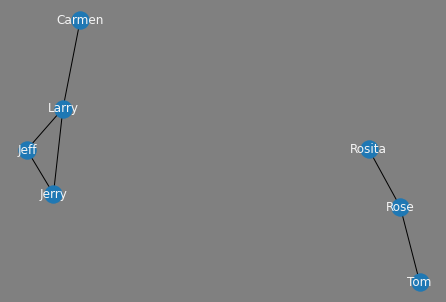

In [7]:
fig = plt.figure()
nx.draw(G, with_labels=True, font_color="whitesmoke")
fig.set_facecolor('gray')
plt.show()

What if I wanted each node in our network to have an individual color? We can do that too by setting up a color map.

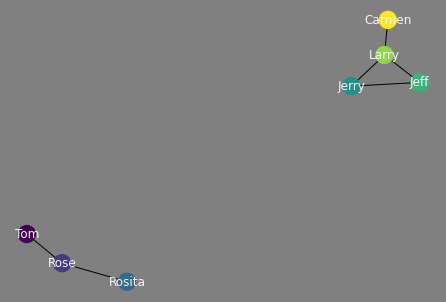

In [8]:
val = []
for i in range(len(G.nodes)):
    val.append(i)
nx.set_node_attributes(G, val, 'val')
fig = plt.figure()
nx.draw(G, with_labels=True, node_color=val, font_color="whitesmoke")
fig.set_facecolor('gray')
plt.show()